#IMPORT LIBRARY

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)



In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
all_data_customer = df.values.T[1]

In [ ]:
print(df.shape)
print(all_data_customer)

(14, 2)
[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


In [ ]:
sample_size = 10
n_bootstraps = 5

d_array = np.random.choice(all_data_customer,size=(n_bootstraps,sample_size))
print("arrays -----")
print(d_array)

# d_mean_arr = d_array.nanmean(axis = 1)
d_mean_arr = np.nanmean(d_array, axis=1)
print("individual means - ")
print(d_mean_arr)

d_mean_arr = d_array.mean(axis=1)
print("individual means - ")
print(d_mean_arr)

d_mean_arr_sort = np.sort(d_mean_arr)
print("sorted array of means - ", d_mean_arr_sort)

print("data mean - ", np.mean(d_mean_arr_sort))

print(np.percentile(d_mean_arr_sort, 2.5),np.percentile(d_mean_arr_sort, 97.5))
print(np.percentile(d_mean_arr_sort, 10),np.percentile(d_mean_arr_sort, 90.0))

arrays -----
[[10.  2. 10. 20. 20.  5. 10. 20.  5. 13.]
 [ 9.  4.  8.  2. 22. 13.  8.  8.  9.  9.]
 [10.  9.  9. 10.  7.  4.  2.  5.  4. 22.]
 [13.  9. 20. 10. 20.  7.  2. 10.  9. 10.]
 [ 5.  2. 20.  4.  7.  8. 20.  8.  9.  7.]]
individual means - 
[11.5  9.2  8.2 11.   9. ]
individual means - 
[11.5  9.2  8.2 11.   9. ]
sorted array of means -  [ 8.2  9.   9.2 11.  11.5]
data mean -  9.78
8.28 11.450000000000001
8.52 11.3


In [ ]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	d_array = np.random.choice(x,size=(n_bootstraps,sample_size))
	d_mean_arr = d_array.mean(axis = 1)
	d_mean_arr_sort = np.sort(d_mean_arr)
	data_mean = np.mean(d_mean_arr_sort)
	lower = np.percentile(d_mean_arr_sort, 2.5)
	upper = np.percentile(d_mean_arr_sort, 97.5)
	return data_mean, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

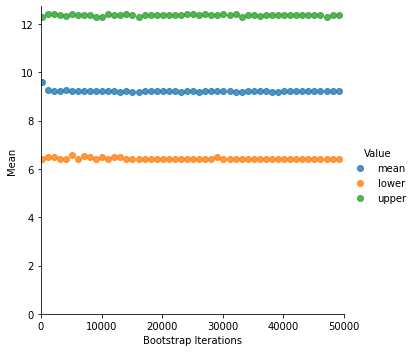

In [ ]:
# Call your bootstrap function and plot the results

boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(all_data_customer, all_data_customer.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [ ]:
#     d_mean_arr = d_array.mean(axis = 1, skipna = True)
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
    d_array = np.random.choice(sample,size=(n_bootstraps,sample_size))
    d_mean_arr = np.nanmean(d_array, axis=1)
    d_mean_arr_sort = np.sort(d_mean_arr)
    data_mean = np.mean(d_mean_arr_sort)
    lower_ci = (100-ci)/2
    upper_ci = 100-lower_ci
    lower = np.percentile(d_mean_arr_sort, lower_ci)
    upper = np.percentile(d_mean_arr_sort, upper_ci)
    return data_mean, lower, upper

Standard deviation bootstrap function...

In [ ]:
def bootstrap_sd_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
    d_array = np.random.choice(sample,size=(n_bootstraps,sample_size))
    d_std_arr = np.std(d_array, axis=1)
    d_std_arr_sort = np.sort(d_std_arr)
    data_std = np.std(d_std_arr_sort)
    lower_ci = (100-ci)/2
    upper_ci = 100-lower_ci
    lower = np.percentile(d_std_arr_sort, lower_ci)
    upper = np.percentile(d_std_arr_sort, upper_ci)
    return data_std, lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

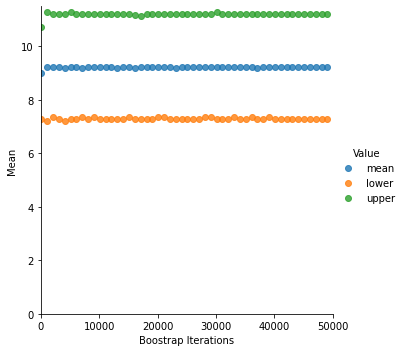

In [ ]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(all_data_customer, all_data_customer.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

#Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


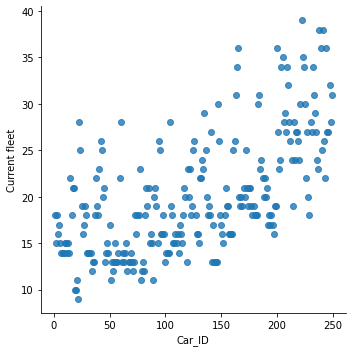

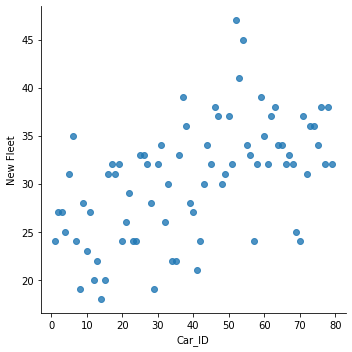

In [ ]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
df_vehicles = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
df_vehicles.insert(0, 'Car_ID', range(1, 1 + len(df_vehicles)))



# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
sns.lmplot(df_vehicles.columns[0], df_vehicles.columns[1], data=df_vehicles, fit_reg=False)
sns.lmplot(df_vehicles.columns[0], df_vehicles.columns[2], data=df_vehicles, fit_reg=False)
# Note: you can add more cells as needed to organise your code and your plots

#Compare the two fleets


The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.

Calculate the mean of both samples.
Using the bootstrap function that you created:
Construct the 95% CI of the mean of the current fleet.
Construct the 95% CI of the mean of the new fleet.
Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [ ]:
# <---INSERT YOUR CODE HERE--->
# 1. Calculate the mean of both samples.
df_means = df_vehicles.mean(axis = 0, skipna = True)
print(df_means)
print("------")
# bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci)
data_mean_curr, lower_curr, upper_curr = bootstrap_mean_ci(df_vehicles.iloc[:,1], 15, 15, 95)
print(data_mean_curr, lower_curr, upper_curr)
print("------")
sample = df_vehicles.iloc[:,2].dropna()
print(sample)
data_mean_new, lower_new, upper_new = bootstrap_mean_ci(sample, 15, 10000, 80)
print(data_mean_new, lower_new, upper_new)
data_std_new, lower_new, upper_new = bootstrap_sd_ci(sample, 15, 10000, 99)
print(data_std_new, lower_new, upper_new)

Car_ID           125.000000
Current fleet     20.144578
New Fleet         30.481013
dtype: float64
------
19.96888888888889 17.529999999999998 22.869999999999997
------
0     24.0
1     27.0
2     27.0
3     25.0
4     31.0
      ... 
74    34.0
75    38.0
76    32.0
77    38.0
78    32.0
Name: New Fleet, Length: 79, dtype: float64
30.49045333333333 28.466666666666665 32.46666666666667
1.0389105275743238 3.24276288090292 8.49951619838207


In [ ]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):


def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array, old
    sample2: 1D array (note that the size of the two arrays can be different), new
    n_permutations: number of permutations to calculate the p-value
    """
    tobs = np.mean(sample2)-np.mean(sample1)

    concat = np.concatenate((sample1, sample2))
    count=0    
    for i in range(n_permutations):
        perm = np.random.permutation(concat)
        pold = perm[:int(len(perm)/2)]
        pnew = perm[int(len(perm)/2):]
        tperm = np.mean(pnew)-np.mean(pold)
        if tperm>tobs:
            count+=1
    pvalue = count/n_permutations
    return pvalue, tperm, tobs

In [ ]:
current_old_data = df_vehicles.iloc[:,1]
new_data = df_vehicles.iloc[:,2].dropna()

# sample1 = [0,0,0,1,1,1,1,1,0,0,0]
# sample2 = [1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,1,0]

pvalue = permut_test(current_old_data, new_data, 30000)
print(pvalue)

(0.0, 1.3414634146341449, 10.336434344974837)


Voting data csv

In [ ]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

print(len(dem_share_PA))
print(len(dem_share_OH))

data_mean_new, lower_new, upper_new = bootstrap_mean_ci(dem_share_OH, 15, 20000, 95)
print(data_mean_new, lower_new, upper_new)

data_mean_new, lower_new, upper_new = bootstrap_mean_ci(dem_share_PA, 15, 20000, 95)
print(data_mean_new, lower_new, upper_new)

pvalue = permut_test(dem_share_PA, dem_share_OH, 10000)
print(pvalue)

67
88
44.32240813333333 39.22723333333333 49.276716666666665
45.48333796666667 40.79731666666666 50.66470000000001
(0.766, 0.03821012321010642, -1.1582360922659447)


# QUIZ2

In [ ]:
# 1.When you reduce the confidence interval (e.g., from 95% to 80%), the range between the lower and upper limits...
# ans: decreases

In [ ]:
# 2.The 92% confidence interval for the mean of the old fleet in the vehicles dataset using 10000 iterations is (Answer, Answer). 
# Give your answer including the first two decimal points (e.g., 1.23).
bootstrap_mean_ci(current_old_data,current_old_data.shape[0],10000,92)
# ans: 19.44,20.86

(20.146577108433732, 19.44176706827309, 20.863453815261042)

In [ ]:
# 3.The 80% confidence interval for the mean of the new fleet in the vehicles dataset using 10000 iterations is (Answer, Answer). 
# Give your answer including the first two decimal points (e.g., 1.23).
bootstrap_mean_ci(new_data,new_data.shape[0],10000,80)
# ans: 29.58,31.34

(30.470164556962025, 29.582278481012658, 31.341772151898734)

In [ ]:
# 4.The 99% confidence interval for the standard deviation of the old fleet in the vehicles dataset using 10000 iterations is (Answer, Answer)
# Give your answer including the first two decimal points (e.g., 1.23).
bootstrap_sd_ci(current_old_data,current_old_data.shape[0],10000,99)
# ans: 5.62,7.10

(0.2880174696840336, 5.627839751914542, 7.109929073679108)

In [ ]:
# 5.The 90% confidence interval for the standard deviation of the customers dataset using 10000 iterations is (Answer, Answer). 
# Give your answer including the first two decimal points (e.g., 1.23).
bootstrap_sd_ci(all_data_customer,all_data_customer.shape[0],10000,90)
# ans: 3.01,7.09

(1.2147455834097864, 3.014421120858456, 7.098451253474043)

In [ ]:
# 6.Assume that you are comparing the difference in means between two sets of data through a permutation test, which has given you a p value. 
# If the significance level has been fixed at 0.05, which of the following statements are true?
# ans: 
# 6.1.If p > 0.1, there is no difference between the two sets of data.
# 6.2.If p < 0.05, the two sets of data are statistically different.
# 6.3.If p < 0.05, we reject the null hypothesis.

In [ ]:
# 7.1.Using the data from the vehicles.csv file:
# We want to know whether the new fleet is better than the old one (i.e., if the difference in the means is positive).
# The Null hypothesis is:
# ans:There is no difference between the mean MPG between the old and the new fleet
# 7.2.The alternative hypothesis is
# The mean MPG in the new fleet is larger than the mean MPG for the old fleet
permut_test(current_old_data, new_data, 30000)
# 7.3. The p-value from a permutation test with 30000 permutations is Answer (give 3 decimal points, e.g., 0.456). Since this value is Answer
#  0.01 (our significance level), we ...
# ans: 0, <, Reject the Null hypothesis
# 7.4.If an error had occurred in our inference above, what type of error would it be? 
# ans: Type I error


(0.0, 0.1707317073170742, 10.336434344974837)

In [ ]:
# 8.1.The data for this question is in voting_data.py.
# The file contains data for the 2008 US presidential election results from the “swing states” of PA and OH, specifically, 
# the percentage of voters who voted for the Democrats within each county in a given state. There are Answer
# values (i.e., states) in PA and Answer in OH.
# print(len(dem_share_PA))
# print(len(dem_share_OH))
# ans: 67,88

# 8.2.We want to know whether voters in PA were more likely than voters in OH to support the Democratic candidate.
# The Null hypothesis is:
# ans: There is no difference between the mean votes for PA and OH
# The alternative hypothesis is
# ans:The mean in PA voting is larger than the mean in OH voting



# 8.3.The 95% confidence intervals for the means of the votes using 20000 bootstraps are (give two decimal values, e.g., 1.23):

# For OH: (Answer, Answer)
# bootstrap_mean_ci(dem_share_OH, np.shape(dem_share_OH)[0], 20000, 95)
# ans: 42.25,46.35

# For PA: (Answer, Answer)
# bootstrap_mean_ci(dem_share_PA, np.shape(dem_share_PA)[0], 20000, 95)
# ans: 43.17,47.86


# 8.4.The p-value from a permutation test with 10000 permutations is Answer
#  (give 3 decimal points, e.g., 0.456). Since this value is Answer
#  0.05 (our significance level), we ...
# permut_test(dem_share_OH, dem_share_PA, 30000)

# ans: 0.236,Fail to reject the Null hypothesis,Type II error


(0.23656666666666668, -0.888796203796204, 1.1582360922659447)